In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import particlesim.api
import particlesim.helpers_for_tests
import particlesim.utils.xyz
import particlesim.utils.config_parser
import particlesim.utils.conversion
from particlesim.k_cython import fast_distances

from mpl_toolkits.mplot3d import Axes3D

In [4]:
def plot_nacl(traj,left,right,num_na,traj_sample = -1):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    last_na_pos = traj[traj_sample,:num_na,:]
    last_cl_pos = traj[traj_sample,num_na:,:]
    
    a =(last_na_pos <= right)*(last_na_pos >=left)
    a = a[:,0]*a[:,1]*a[:,2]
    small_box_na = last_na_pos[a]
    b = (last_cl_pos <= right)*(last_cl_pos >=left)
    b = b[:,0]*b[:,1]*b[:,2]
    
    small_box_cl = last_cl_pos[b]
    ax.scatter(small_box_na[:,0],small_box_na[:,1],small_box_na[:,2],c='r')
    ax.scatter(small_box_cl[:,0],small_box_cl[:,1],small_box_cl[:,2],c='b')
    ax.set_xlim([left,right])
    ax.set_ylim([left,right])
    ax.set_zlim([left,right])


## Config File:


In [5]:
# %load /home/mark/Dokumente/Studium/Master/WS1617/CompSci/compscie-mc/jupyter_notebooks/config/8_particle_nacl_rand.cfg
[general]
box-size = 12

[particle_class_1]
label = Natrium
type = NA
charge = 1
distribution = uniform
number = 4

[particle_class_2]
label = Chlor
type = CL
charge = -1
distribution = uniform
number = 4


SyntaxError: can't assign to operator (<ipython-input-5-8a2aab9b606c>, line 3)

In [6]:
creator = particlesim.utils.config_parser.ProblemCreator("/home/mark/Dokumente/Studium/Master/WS1617/CompSci/compscie-mc/jupyter_notebooks/config/8_particle_nacl_rand.cfg")

In [7]:
system_config = creator.generate_problem()

In [8]:
sampler = particlesim.api.Sampler(system_config)

In [9]:
particlesim.utils.conversion.beta_to_kelvin(0.001)

503219.1485090949

In [10]:
len([0.1,1])

2

In [11]:
traj,pot = sampler.metropolis_sa(iteration_number=100,beta=[0.1,1])

<IPython.core.display.Javascript object>


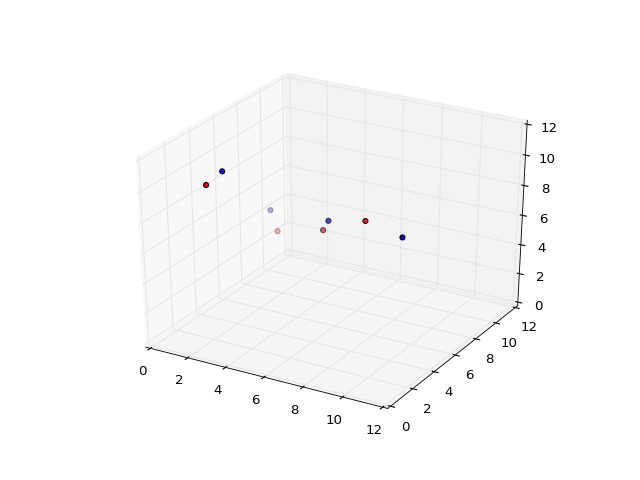

In [12]:
plot_nacl(traj=traj,left=0,right=12,num_na=4,traj_sample=-1)

In [15]:
def create_system_conf_with_na_and_cl(num_na, num_cl, box_size = 12):
    particles = particlesim.helpers_for_tests.create_positions(box_size=box_size,number_of_particles=num_na+num_cl)
    na = {'sigma':1.21496,'epsilon':0.0469,'charge':1}
    cl = {'sigma':2.02234, 'epsilon':0.15,'charge':-1.0}
    return particlesim.api.SystemConfiguration(xyz=particles, 
                                                      sigmas=([na['sigma']]*num_na)+([cl['sigma']]*num_cl),
                                                      epsilons=[na['epsilon']]*num_na+[cl['epsilon']]*num_cl,
                                                      charges=[na['charge']]*num_na+[cl['charge']]*num_cl,
                                                      box_size=box_size)


In [85]:
sys_conf_64 = create_system_conf_with_na_and_cl(50,50,16)

In [86]:
sampler2 = particlesim.api.Sampler(sys_conf_64)

In [101]:
iteration_number = 1

In [102]:
beta = [0.2,0.8]
beta_values = 1.0 / np.linspace(1.0 / beta[1], 1.0 / beta[0], iteration_number)[::-1]

In [103]:
print("von ", particlesim.utils.conversion.beta_to_kelvin(beta[0]), " °K bis ", particlesim.utils.conversion.beta_to_kelvin(beta[1]), " °K")

von  2516.0957425454744  °K bis  629.0239356363686  °K


In [104]:
traj_64,pot_64 = sampler2.metropolis_sa(iteration_number,beta=beta,step=0.009)

<IPython.core.display.Javascript object>


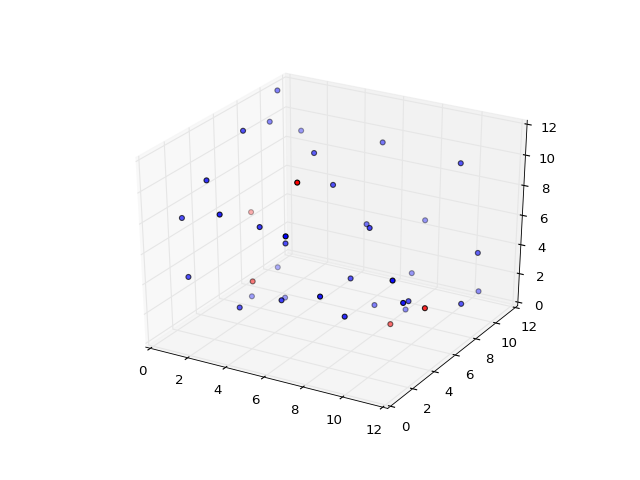

In [105]:
plot_nacl(traj=traj_64,left=0,right=12,num_na=8,traj_sample=-1)

In [23]:
pot_64[-1]

-2185.015450743982

<IPython.core.display.Javascript object>


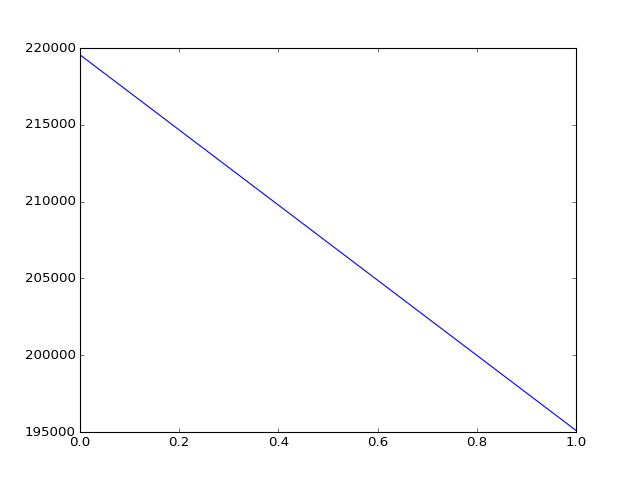

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pot_64)
#ax.set_ylim([pot_64[-1]-200,0])

In [44]:
dif = pot_64[:-1] - pot_64[1:]

<IPython.core.display.Javascript object>


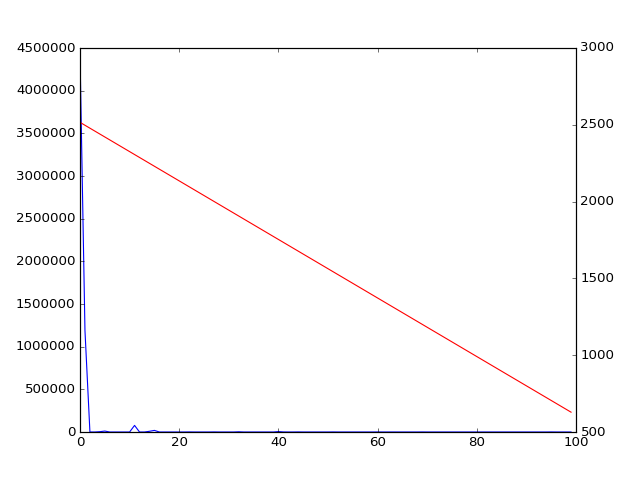

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dif)
ax2 = ax.twinx()
ax2.plot(particlesim.utils.conversion.beta_to_kelvin(beta_values), c='r')

In [107]:
distances = sys_conf_64._total_potential.shortrange.distances
print(distances.shape)

(100, 100)


In [108]:
dists = distances[np.triu_indices(distances.shape[0],1)] 
print(dists.shape)

(4950,)


<IPython.core.display.Javascript object>


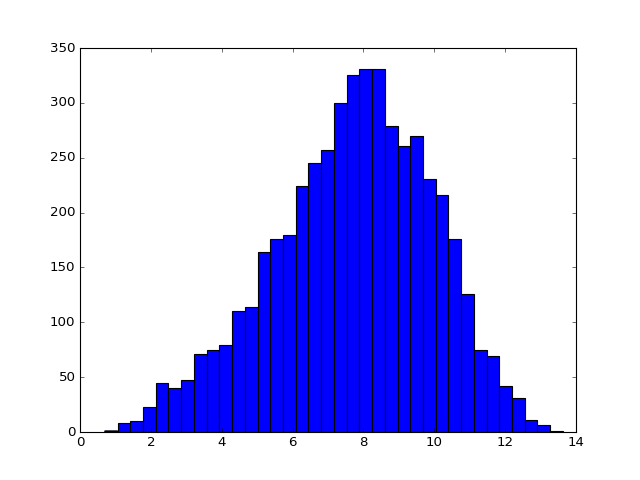

(array([   1.,    8.,   10.,   23.,   45.,   40.,   47.,   71.,   75.,
          79.,  110.,  114.,  164.,  176.,  180.,  224.,  245.,  257.,
         300.,  325.,  331.,  331.,  279.,  261.,  270.,  231.,  216.,
         176.,  126.,   75.,   69.,   42.,   31.,   11.,    6.,    1.]),
 array([  0.7009795 ,   1.06014609,   1.41931268,   1.77847927,
          2.13764586,   2.49681245,   2.85597903,   3.21514562,
          3.57431221,   3.9334788 ,   4.29264539,   4.65181198,
          5.01097857,   5.37014516,   5.72931175,   6.08847834,
          6.44764493,   6.80681152,   7.16597811,   7.5251447 ,
          7.88431129,   8.24347788,   8.60264447,   8.96181106,
          9.32097765,   9.68014424,  10.03931082,  10.39847741,
         10.757644  ,  11.11681059,  11.47597718,  11.83514377,
         12.19431036,  12.55347695,  12.91264354,  13.27181013,  13.63097672]),
 <a list of 36 Patch objects>)

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(dists, bins='auto')